# Are the time series stationary?
*Explore, test for stationary. Advise on transformations*

## Libraries

In [5]:
#Importing libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Data

In [6]:
can_crossings_000 = pd.read_csv('Can_Crossings.csv', index_col = 0)
can_crossings_000.index = pd.to_datetime(can_crossings_000.index)
can_crossings_000.head()

,Americans,Canadians,Year,Month
REF_DATE,,,,
1972-01-01,616944.0,810082.0,1972,1
1972-02-01,620144.0,764783.0,1972,2
1972-03-01,727056.0,908528.0,1972,3
1972-04-01,834346.0,1023422.0,1972,4
1972-05-01,1110105.0,1095222.0,1972,5


## Exploration

### What period does the time series cover?

Versions
* 000 - See Main_BorderCrossings for Data Wrangling
* 001 - Removed 2019, only three months were present (based on seasonal differencing)

In [10]:
print("\n----------- Minimum -----------\n")
print(can_crossings_001.index.min())
 
print("\n----------- Maximum -----------\n")
print(can_crossings_001.index.max())


----------- Minimum -----------

1972-01-01 00:00:00

----------- Maximum -----------

2018-12-01 00:00:00


*There are only three months for 2019. This incomplete annual record should be removed*

**Remove 2019 from the record**

In [9]:
can_crossings_001 = can_crossings_000.loc['1972':'2018']

### Decompose Time Series
**US Vehicles**

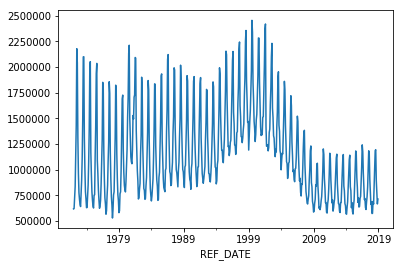

In [11]:
can_crossings_001['Americans'].plot()
plt.show()

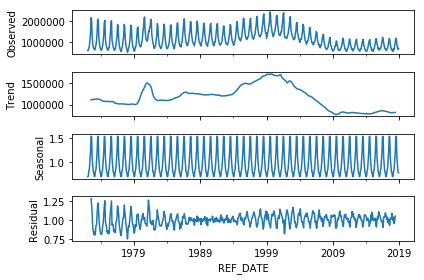

In [12]:
usa_decompose = seasonal_decompose(can_crossings_001['Americans'], freq = 12, model='multiplicative')
usa_decompose.plot()
plt.show()

**Trend**: A multimodal trend.

**Seasonal**: Strong annual pattern. *Should be removed by smoothing*

**Residual**: Non-stationary variance, vast differences in the amplitude. 1984 to present the residual might be stationary. Likely need to sub-sample the dataset.


**Canada Vehicles**

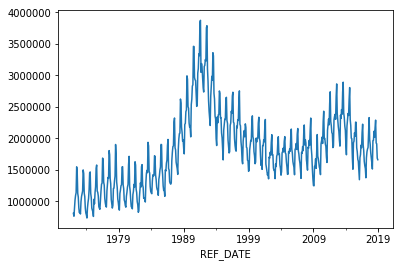

In [13]:
can_crossings_001['Canadians'].plot()
plt.show()

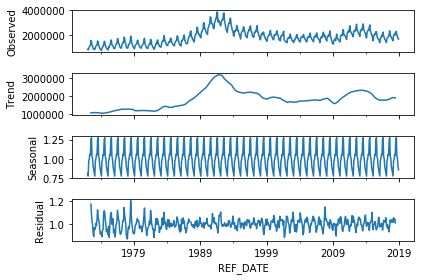

In [14]:
can_decompose = seasonal_decompose(can_crossings_001['Canadians'],
                                  freq = 12,
                                  model = 'multiplicative')
can_decompose.plot()
plt.show()

**Trend**: A multimodal trend.

**Seasonal**: Strong annual pattern. *Should be removed by smoothing*

**Residual**: Non-stationary variance, vast differences in the amplitude. 2000 to present the residual might be stationary. Likely need to sub-sample the dataset. There appears to a nother level of seasonality in the data. *Repeat this test after smoothing stationary signal*.

## The Answer

Versions
000 - Neither time series is stationary. The first obvious issue is the annual seasonality. This can be removed by seasonaly differencing. Differencing between an observation and the corresponding observation from the previous year. First confirm that it is an annual trend.

# Output Files

Versions
* 000 - See Main_BorderCrossings
* 001 - Removed 2019

In [15]:
can_crossings_001.to_csv("can_crossings_001.csv")